In [1]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
from skimage.io import imread
from random import randint
import numpy as np
import utils
from skimage.transform import resize


In [2]:
cut_img_paths = glob.glob("./Kotelet/Cut/*.png")
glove_img_paths = glob.glob("./Kotelet/Glove/*.png")
normal_img_paths = glob.glob("./Kotelet/Normal/*.png")
print("Amount of cut kotlet images =", len(cut_img_paths))
print("Amount of glove kotlet images =", len(glove_img_paths))
print("Amount of normal kotlet images =", len(normal_img_paths))
img = imread(glove_img_paths[0])
print("Image shape: " + str(img.shape))

Amount of cut kotlet images = 110
Amount of glove kotlet images = 65
Amount of normal kotlet images = 210
Image shape: (400, 400, 3)


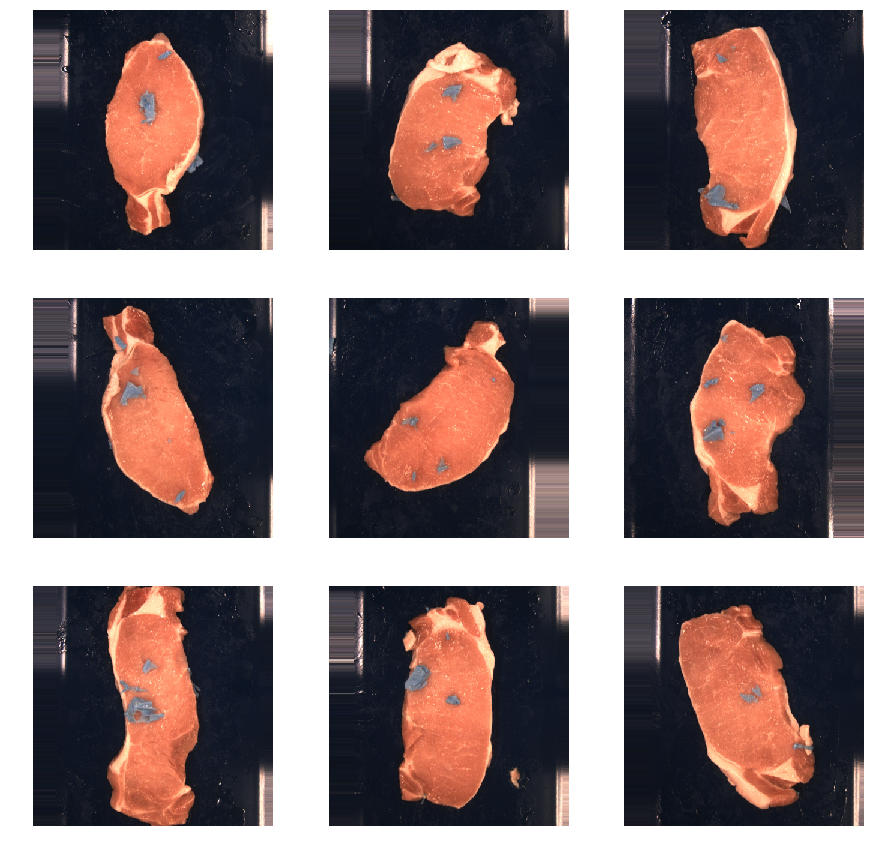

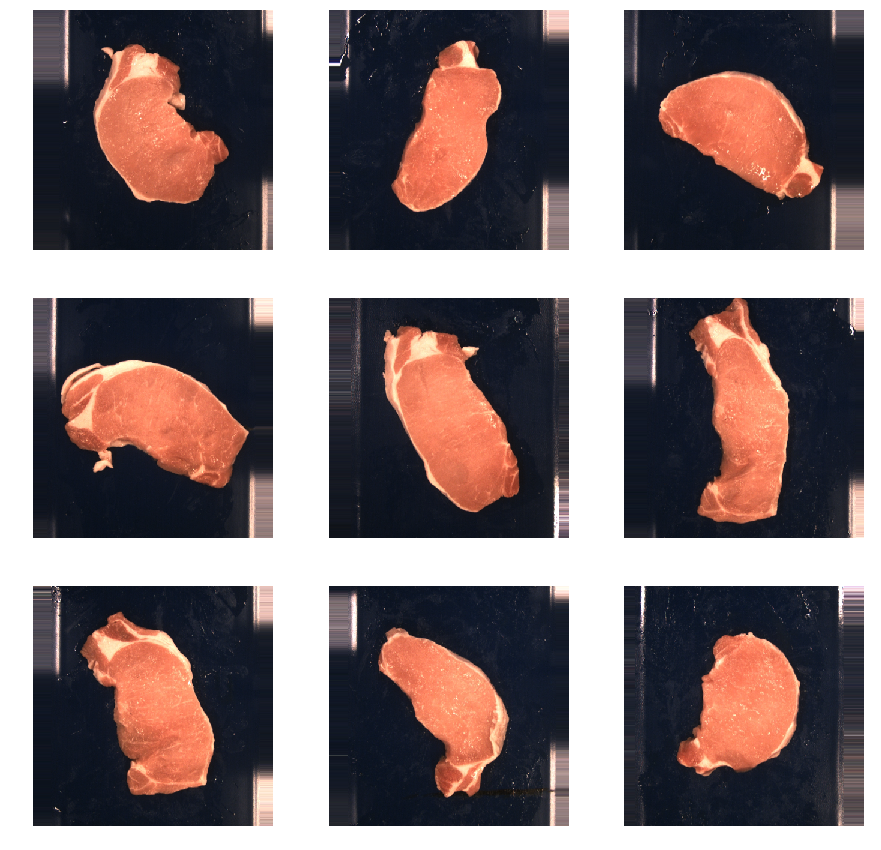

In [9]:
def plot_first_nine(img_paths):
    fig = plt.figure(figsize=(15, 15))
    for i, img_path in enumerate(img_paths[0:9]):
        plt.subplot(3, 3, i + 1)
        image = imread(img_path)
        image_resized = resize(image, (100, 100), mode='constant')
        plt.imshow(image)
        plt.axis('off')

    plt.show()

    
plot_first_nine(glove_img_paths)
#plot_first_nine(cut_img_paths)
plot_first_nine(normal_img_paths)

In [128]:
from tensorflow.contrib.layers import fully_connected, convolution2d, flatten, batch_norm, max_pool2d, dropout
from tensorflow.python.ops.nn import relu, elu, relu6, sigmoid, tanh, softmax
from tensorflow import layers, reshape


# The latent variable layer, where we can try out activation functions
#l_z = layers.dense(inputs=l_enc, units=2, activation=None, name='l_z') # None indicates a linear output.


In [137]:
height, width, channels = IMAGE_SHAPE = (100, 100, 3)
tf.reset_default_graph()
x_image_pl = tf.placeholder(tf.float32, [None, height, width, channels], name="x-image_pl")
orig_shape = tf.shape(x_image_pl)
x_pl_flattened = flatten(x_image_pl)

construction_time_shape = x_pl_flattened.get_shape()
runtime_shape = tf.shape(x_pl_flattened)
print("x_image_pl", construction_time_shape)

with tf.name_scope('denoising_autoencoder'):
    encoded = layers.dense(inputs=x_pl_flattened, units=10, activation=relu, name='encoder_weights')
    encoded_shape = tf.shape(encoded)
    decoded = layers.dense(inputs=encoded, units=10, activation=relu, name='decoder_weights')
    recon = layers.dense(inputs=decoded, units=30000, activation=sigmoid)
    recon_orig_shape = reshape(recon,  orig_shape)
    
with tf.name_scope('loss')
    loss_per_pixel = tf.square(tf.subtract(x_pl_flattened, recon))
    # Binary cross-entropy error
    # loss_per_pixel = - x_pl * tf.log(l_out) - (1 - x_pl) * tf.log(1 - l_out)
    loss = tf.reduce_mean(loss_per_pixel, name="mean_error")

# If you want regularization
#reg_scale = 0.0005
#regularize = tf.contrib.layers.l2_regularizer(reg_scale)
#params = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
#reg_term = tf.reduce_sum([regularize(param) for param in params])
#loss += reg_term

# define our optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.25)
# optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
# Training operator for applying the loss gradients in backpropagation update
train_op = optimizer.minimize(loss)
    


x_image_pl (?, 30000)


In [138]:
tf.summary.merge_all()
sess = tf.Session()
tmp_def=sess.graph_def
#tmp_def = utils.rename_nodes(sess.graph_def, lambda s:"/".join(s.split('_',1)))
utils.show_graph(tmp_def)


In [146]:
#cut_imgs = np.asarray([resize(imread(img), (100, 100), mode='constant') for img in cut_img_paths])
imgs = np.asarray([resize(imread(img), (100, 100), mode='constant') for img in glove_img_paths])
#imgs = np.asarray([imread(img) for img in glove_img_paths])
#normal_imgs = np.asarray([resize(imread(img), (100, 100), mode='constant') for img in normal_img_paths])

#imgs = np.concatenate((cut_imgs, glove_imgs, normal_imgs), axis=0)

sess.run(tf.global_variables_initializer())
feed_dict = {
    x_image_pl: imgs
}

res = sess.run(fetches=[recon, orig_shape], feed_dict=feed_dict)

recon_imgs = res[0]
orig_shape_comp = res[1]

In [144]:
print(imgs[0])

[[[ 0.05294118  0.06862745  0.11176471]
  [ 0.05294118  0.06862745  0.11176471]
  [ 0.05294118  0.06862745  0.11176471]
  ..., 
  [ 0.96078431  0.87352941  0.82156863]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[ 0.05294118  0.07254902  0.10980392]
  [ 0.05294118  0.07254902  0.10980392]
  [ 0.05294118  0.07254902  0.10980392]
  ..., 
  [ 0.93921569  0.85686275  0.80686275]
  [ 0.99803922  1.          0.97647059]
  [ 0.99803922  1.          0.97647059]]

 [[ 0.05294118  0.0745098   0.11568627]
  [ 0.05294118  0.0745098   0.11568627]
  [ 0.05294118  0.0745098   0.11568627]
  ..., 
  [ 0.94313725  0.81764706  0.75392157]
  [ 1.          0.99803922  0.95490196]
  [ 1.          0.99803922  0.95490196]]

 ..., 
 [[ 0.05882353  0.07647059  0.11960784]
  [ 0.05882353  0.07647059  0.11960784]
  [ 0.05882353  0.07647059  0.11960784]
  ..., 
  [ 0.92941176  0.74509804  0.67843137]
  [ 0.75294118  0.61764706  0.58039216]
  [ 0.75294118  0.61764706  0.58039

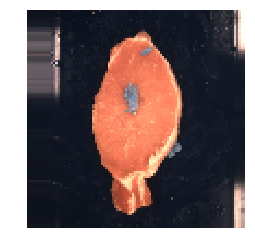

In [141]:
plt.imshow(imgs[0])
plt.axis('off')
plt.show()

In [151]:
print(recon_imgs[0].shape)

(100, 100, 3)


In [152]:
print(orig_shape_comp)

[ 65 100 100   3]


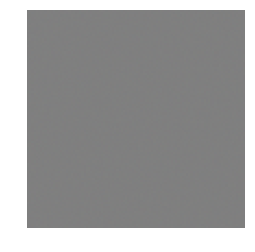

In [154]:
plt.imshow(recon_imgs[0])
plt.axis('off')
plt.show()

In [155]:
print(recon_imgs[0])

[[[ 0.49655139  0.50025767  0.49736166]
  [ 0.5003823   0.50051546  0.50305575]
  [ 0.50058621  0.49866924  0.50060707]
  ..., 
  [ 0.50150371  0.49893826  0.50215977]
  [ 0.49980113  0.50021285  0.49857375]
  [ 0.49902761  0.5037331   0.50121367]]

 [[ 0.50277436  0.50049055  0.50121367]
  [ 0.49828398  0.49995577  0.49587592]
  [ 0.4963544   0.50002205  0.50206524]
  ..., 
  [ 0.50280964  0.49956492  0.50410044]
  [ 0.49932724  0.49854431  0.49978051]
  [ 0.50198293  0.49940646  0.49753705]]

 [[ 0.49693921  0.50177914  0.49722391]
  [ 0.49612299  0.49907818  0.49777171]
  [ 0.49902064  0.50135517  0.50161147]
  ..., 
  [ 0.50164348  0.5006777   0.49687573]
  [ 0.49983358  0.49802491  0.49930656]
  [ 0.49946058  0.50107628  0.50167495]]

 ..., 
 [[ 0.49966109  0.49856734  0.50019568]
  [ 0.49844837  0.49821061  0.49929741]
  [ 0.50181448  0.50043756  0.50154299]
  ..., 
  [ 0.50257504  0.49871868  0.50189757]
  [ 0.49830744  0.50076818  0.49802253]
  [ 0.50080723  0.50026894  0.49956